# Decision Tree

Given Logistic Regression does not work well with our dataset, let's try to use Decision Tree instead.

Decision Tree often work well with non-linear imbalanced dataset

For recap, the threshold predictor result :
```
Threshold Predictor 

Train Data Metrics:
F2 Score on Training Data: 0.7860593624973135
Recall on Training Data: 0.9062363163082587
Precision on Training Data: 0.6459185428659584
Accuracy on Training Data: 0.92275
--------------------------------------------------
Test Data Metrics:
F2 Score on Test Data: 0.8053615831757778
Recall on Test Data: 0.9280162842339008
Precision on Test Data: 0.6571438277056866
Accuracy on Test Data: 0.9275
```

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
X_train=pd.read_csv('X_train.csv')
y_train=pd.read_csv('y_train.csv')
X_test=pd.read_csv('X_test.csv')
y_test=pd.read_csv('y_test.csv')
df_train=pd.concat([X_train, y_train], axis=1)
df_test=pd.concat([X_test, y_test], axis=1)

y_train_omf = y_train['Machine failure']
y_test_omf = y_test['Machine failure']
y_train_over_omf = pd.read_csv('y_oversample_train.csv')
X_train_over_omf = pd.read_csv('X_oversample_train.csv')

X_train_reduced = X_train.drop(columns=['Torque [Nm]', 'Process temperature [K]', 'Air temperature [K]'])
X_test_reduced = X_test.drop(columns=['Torque [Nm]', 'Process temperature [K]', 'Air temperature [K]'])
X_train_over_reduced = X_train_over_omf.drop(columns=['Torque [Nm]', 'Process temperature [K]', 'Air temperature [K]'])


In [65]:
from sklearn.metrics import classification_report, fbeta_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

def analyze_model_performance(clf, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    y_train_omf = y_train['Machine failure']
    y_test_omf = y_test['Machine failure']
    clf.fit(X_train, y_train_omf)
    y_train_pred_omf = clf.predict(X_train)
    y_test_pred_omf = clf.predict(X_test)
    f2_train=fbeta_score(y_train_omf, y_train_pred_omf, beta=2, average='macro')
    f2_test=fbeta_score(y_test_omf, y_test_pred_omf, beta=2, average='macro')
    train_recall=recall_score(y_train_omf, y_train_pred_omf, average='macro')
    test_recall=recall_score(y_test_omf, y_test_pred_omf, average='macro')
    train_precision=precision_score(y_train_omf, y_train_pred_omf, average='macro', zero_division=0)
    test_precision=precision_score(y_test_omf, y_test_pred_omf, average='macro', zero_division=0)
    train_accuracy=accuracy_score(y_train_omf, y_train_pred_omf)
    test_accuracy=accuracy_score(y_test_omf, y_test_pred_omf)
    predictor_name = clf.__class__.__name__


    plt.figure(figsize=(15, 5))
    cm = confusion_matrix(y_train_omf, y_train_pred_omf)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Failure', 'Failure'])
    disp.plot(cmap=plt.cm.Blues, ax=plt.subplot(1, 2, 1))
    plt.title(f'{predictor_name} on Train Data')
    cm = confusion_matrix(y_test_omf, y_test_pred_omf)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Failure', 'Failure'])
    disp.plot(cmap=plt.cm.Blues, ax=plt.subplot(1, 2, 2))
    plt.title(f'{predictor_name} on Test Data')
    plt.show()


    print(" For `Machine failure` label:")
    print(predictor_name, " :")
    print(f"- F2 Score on Training Data: {f2_train}")
    print(f"- F2 Score on Test Data: {f2_test}")
    print(f"- Accuracy on Training Data: {train_accuracy}")
    print(f"- Accuracy on Test Data: {test_accuracy}")
    print(f"- Recall on Training Data: {train_recall}")
    print(f"- Recall on Test Data: {test_recall}")
    print(f"- Precision on Training Data: {train_precision}")
    print(f"- Precision on Test Data: {test_precision}")


## DecisionTree On Imbalanced Data

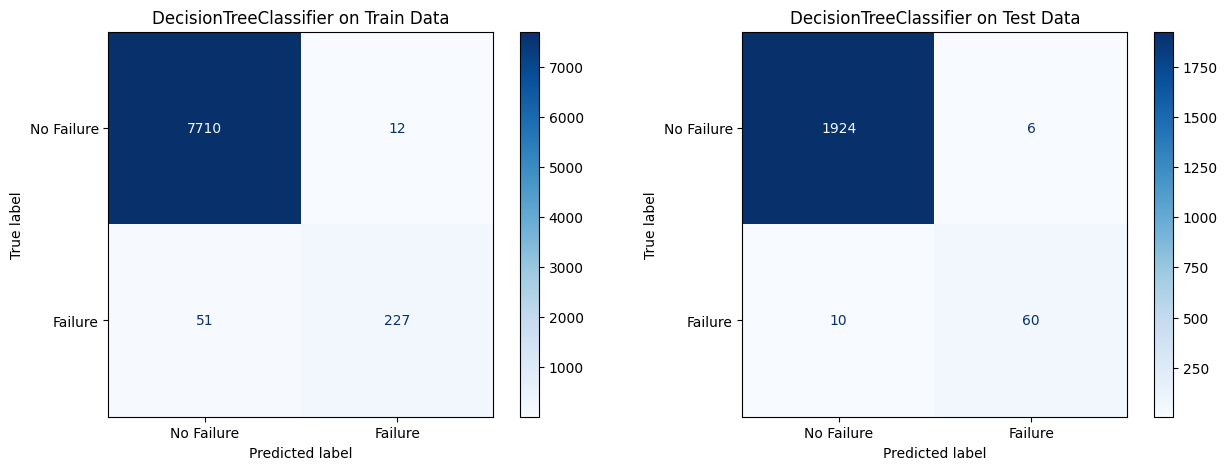

 For `Machine failure` label:
DecisionTreeClassifier  :
- F2 Score on Training Data: 0.9187784578084845
- F2 Score on Test Data: 0.9317650834479942
- Accuracy on Training Data: 0.992125
- Accuracy on Test Data: 0.992
- Recall on Training Data: 0.9074963805179632
- Recall on Test Data: 0.9270170244263508
- Precision on Training Data: 0.9716097384249862
- Precision on Test Data: 0.9519601391369747


In [66]:
from sklearn.tree import DecisionTreeClassifier

cdt = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5)
analyze_model_performance(cdt, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

Threshold Predictor: 
- F2 Score on Training Data: 0.7860593624973135
- F2 Score on Test Data: 0.8053615831757778
- Accuracy on Training Data: 0.92275
- Accuracy on Test Data: 0.9275

LogisticRegression:
- F2 Score on Training Data: 0.642806888238361
- F2 Score on Test Data: 0.6119487264330775
- Accuracy on Training Data: 0.970875
- Accuracy on Test Data: 0.9685

DecisionTreeClassifier  :
- F2 Score on Training Data: 0.9187784578084845
- F2 Score on Test Data: 0.9317650834479942
- Accuracy on Training Data: 0.992125
- Accuracy on Test Data: 0.992


Decision Tree performed so much better than logistic regression.

Decision Tree also performed better than Threshold Predictor.

## Logistic Regression on Balanced Data


Let's see if using balanced dataset will improved our F2 and accuracy

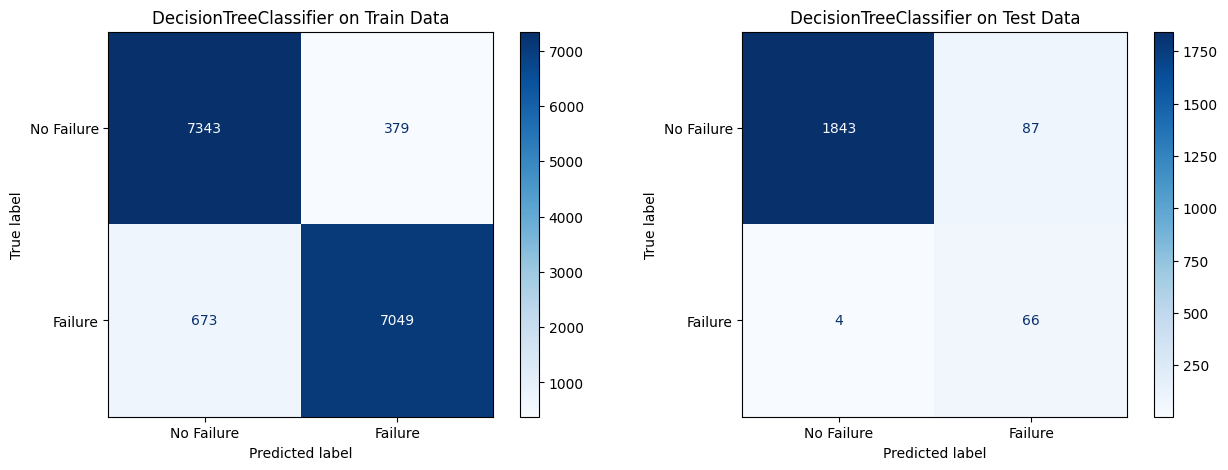

 For `Machine failure` label:
DecisionTreeClassifier  :
- F2 Score on Training Data: 0.931792003656209
- F2 Score on Test Data: 0.8626657841101689
- Accuracy on Training Data: 0.9318829318829319
- Accuracy on Test Data: 0.9545
- Recall on Training Data: 0.9318829318829319
- Recall on Test Data: 0.9488897113249445
- Precision on Training Data: 0.9325098792721505
- Precision on Test Data: 0.7146034374767773


In [67]:
from sklearn.tree import DecisionTreeClassifier

cdt = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5)
analyze_model_performance(cdt, X_train=X_train_over_omf, y_train=y_train_over_omf, X_test=X_test, y_test=y_test)

Threshold Predictor: 
- F2 Score on Training Data: 0.7860593624973135
- F2 Score on Test Data: 0.8053615831757778
- Accuracy on Training Data: 0.92275
- Accuracy on Test Data: 0.9275

DecisionTreeClassifier  :
- F2 Score on Training Data: 0.9187784578084845
- F2 Score on Test Data: 0.9317650834479942
- Accuracy on Training Data: 0.992125
- Accuracy on Test Data: 0.992

DecisionTreeClassifier on balanced dataset:
- F2 Score on Training Data: 0.931792003656209
- F2 Score on Test Data: 0.8626657841101689
- Accuracy on Training Data: 0.9318829318829319
- Accuracy on Test Data: 0.9545

Using balanced dataset where we have more failure data, Decision Tree classifier performed very well and improved compared to Threshold Predictor

However, while it reduced the number of False Negative, it increased False Positive by large amount 6->87 which is not a good outcome
Our F2-score actually went down

In [68]:
cdt

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

## Decision Tree on Reduced Features


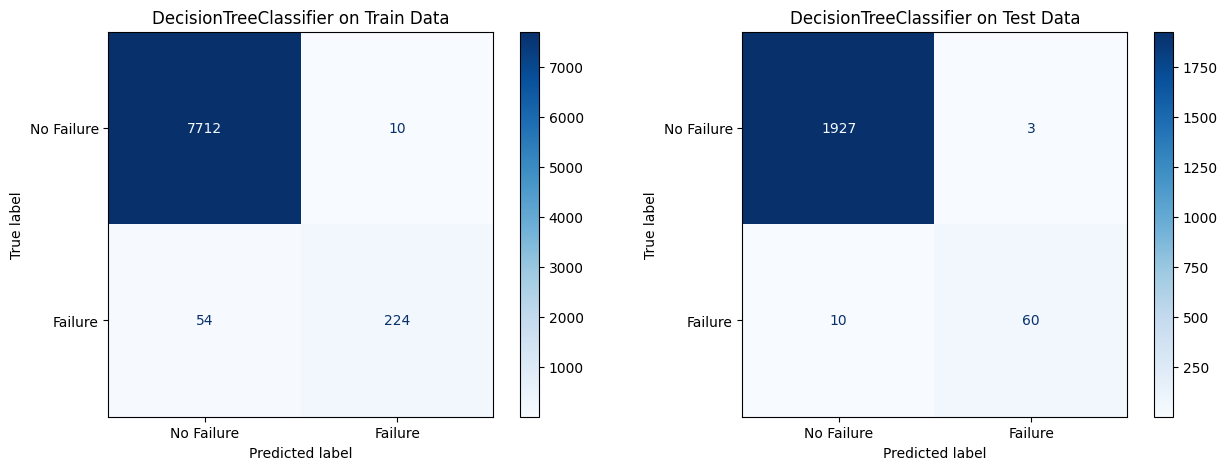

 For `Machine failure` label:
DecisionTreeClassifier  :
- F2 Score on Training Data: 0.9148316327326882
- F2 Score on Test Data: 0.9361787141519724
- Accuracy on Training Data: 0.992
- Accuracy on Test Data: 0.9935
- Recall on Training Data: 0.9022301971942259
- Recall on Test Data: 0.9277942264988897
- Precision on Training Data: 0.9751557853540856
- Precision on Test Data: 0.9736091648843326


In [69]:
from sklearn.tree import DecisionTreeClassifier

cdt = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5)
analyze_model_performance(cdt, X_train=X_train_reduced, y_train=y_train, X_test=X_test_reduced, y_test=y_test)

DecisionTreeClassifier  :
- F2 Score on Training Data: 0.9187784578084845
- F2 Score on Test Data: 0.9317650834479942
- Accuracy on Training Data: 0.992125
- Accuracy on Test Data: 0.992

DecisionTreeClassifier on balanced training data
- F2 Score on Training Data: 0.931792003656209
- F2 Score on Test Data: 0.8626657841101689
- Accuracy on Training Data: 0.9318829318829319
- Accuracy on Test Data: 0.9545

DecisionTreeClassifier  on reduced dataset :
- F2 Score on Training Data: 0.9148316327326882
- F2 Score on Test Data: 0.9361787141519724
- Accuracy on Training Data: 0.992
- Accuracy on Test Data: 0.9935

Reducing features seemed to improve our decision tree classifier as it reduce false positive from 6 to 3

# Multi-label / output Classifier

Given our data is actually multilabel, it will be good to produce a model that can also identify the type of failures not just `Machine failure`

However, we won't be able to use balanced dataset unless we could figure out how to create balanced data set for multi label data

Number of mismatches: 14 out of 2000 predictions
Percentage of mismatches: 0.70%


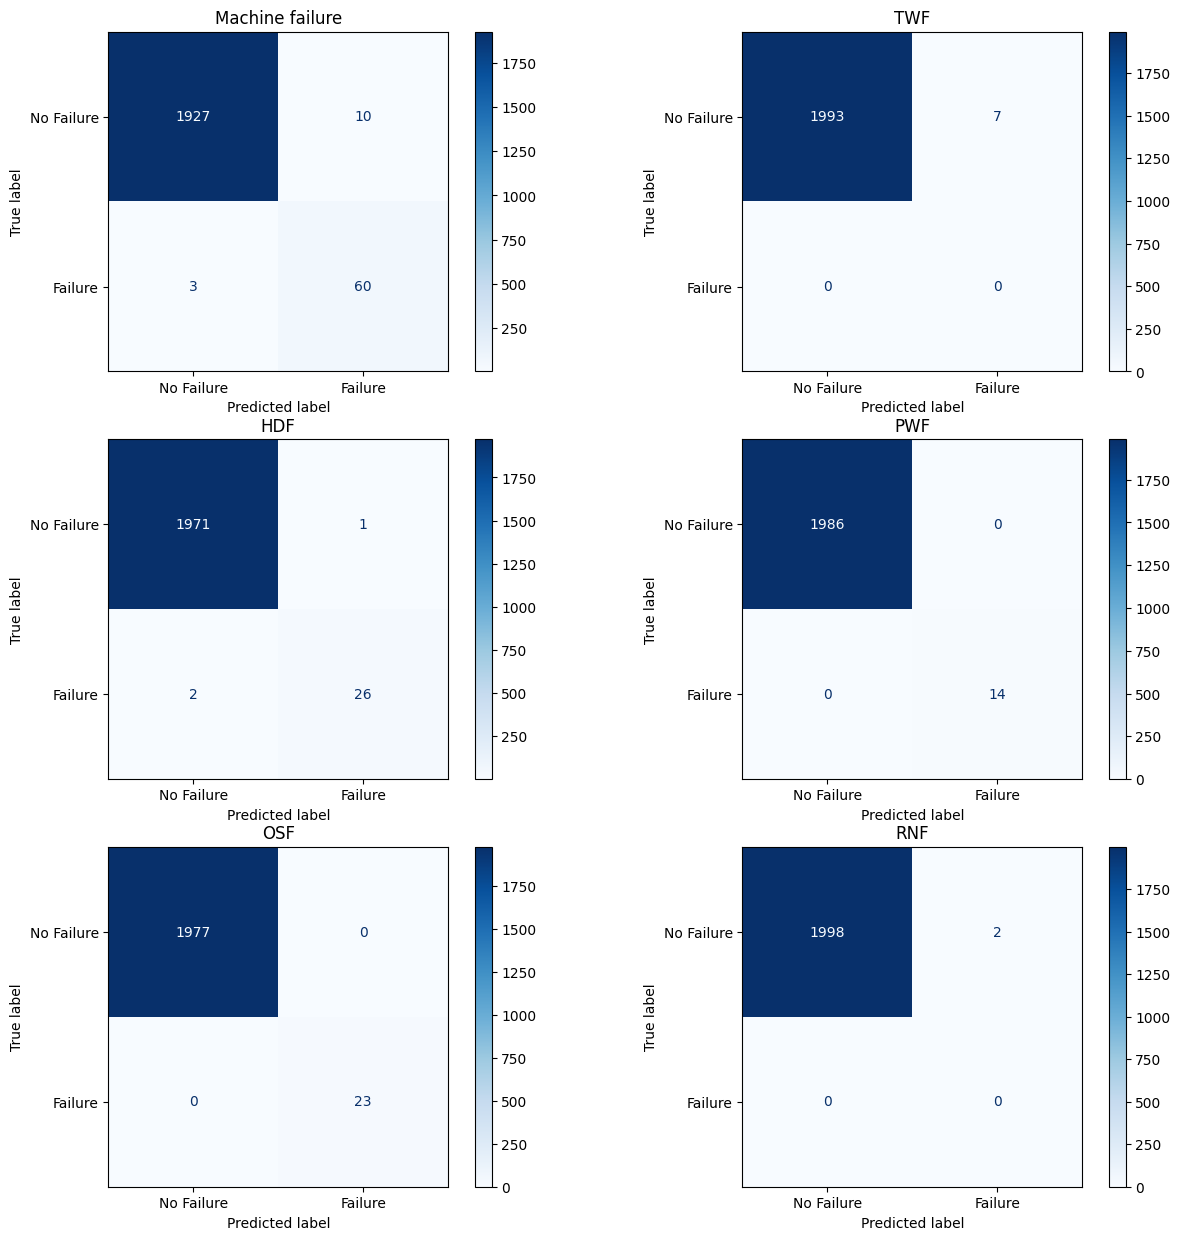

F2 value on test data 0.9361787141519724
Accuracy on test data 0.9935


In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
cdt = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5)
cdt = MultiOutputClassifier(cdt)
cdt.fit(X_train_reduced, y_train)
y_pred=cdt.predict(X_test_reduced)
y_pred = pd.DataFrame(y_pred, columns=y_test.columns)
count_mismatches = 0
for i in range(len(y_pred)):
    for col in y_pred.columns:
        if y_pred[col][i] != y_test[col][i]:
            count_mismatches += 1
            break
print(f"Number of mismatches: {count_mismatches} out of {len(y_pred)} predictions")
print(f"Percentage of mismatches: {count_mismatches / len(y_pred) * 100:.2f}%")
no_of_label = len(y_test.columns)
i = 0
no_of_column = 2
no_of_row = no_of_label // no_of_column
plt.figure(figsize=(15,15))
for label in y_test.columns:
    i +=1
    ax=plt.subplot(no_of_row, no_of_column, i)
    cm = confusion_matrix(y_pred[label],y_test[label])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Failure', 'Failure'])
    disp.plot(cmap=plt.cm.Blues, ax=ax)
    plt.title(label=label)
plt.show()
f2_test=fbeta_score(y_test['Machine failure'], y_pred['Machine failure'], beta=2, average='macro')
accuracy=accuracy_score(y_test['Machine failure'], y_pred['Machine failure'])
print("F2 value on test data", f2_test)
print("Accuracy on test data", accuracy)


Looking at the output for 'Machine Learning' our multi-output classifier actually performed better than all other classifier that we trained previously

For machine failure:
- False Negative is very low
- False Positive increased but by a little bit
- F2 is good 0.9361787141519724
- Accuracy is 0.9935

# Conclusion

We learned few things while evaluating DecisionTreeClassifier

- Reduced Features improve the F2 and Accuracy as we have simpler model and less noises
- Multi-output classifier work well
- SMOTE Balanced dataset may not work well for our dataset given that we may accidentally introduce noises by injecting synthetic observations that may destroy the pattern of the minority class (ref: https://towardsdatascience.com/why-smote-is-not-necessarily-the-answer-to-your-imbalanced-dataset-ef19881da57a/)

